Importing the dependencies (Libraries)

In [2]:

import numpy as np # for array

# dataframes are structured table. 
# it is better to load csv file as datadrame 
# as we can do better data analysis using dataframe.

import pandas as pd 

# For Visualisations

import matplotlib.pyplot as plt
import seaborn as sns

# For algorithm

from sklearn.cluster import KMeans

Data Collection and Analysis

In [5]:
customer_data =  pd.read_csv('/Users/shreyarai/Documents/Data analysis project/Customer Segmentation/Mall_Customers.csv')

In [7]:
#first 5 rows in the dataframe
customer_data.head(5) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# to find number of rows and columns
customer_data.shape 

(200, 5)

In [13]:
#getting information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
#checking missing values
customer_data.isnull() 
#this gives a boolean represrntation 
#however we need the count, for that we will add sum at the end

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [15]:
customer_data.isnull().sum() 
# Here, we dnt have any null values therefore we will move on to next step.
# Suppose we had any null values we would have done imputations

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing columns we need
Here we dont need customerid, as we are gonna group the customer by spending score.
age and gender is also not used for this project. However we can use that as well.

In [22]:
#x = customer_data.iloc[:,3:4]
X = customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the number of clusters
WCSS -> Within Clusters Sum of Squares (Parameter)
- the sum of the distances between the data points and the corresponding centroid for each cluster.
- the distance between each data point and its centroid.


In [25]:
# find in wcss value for different number of clusters

wcss= []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

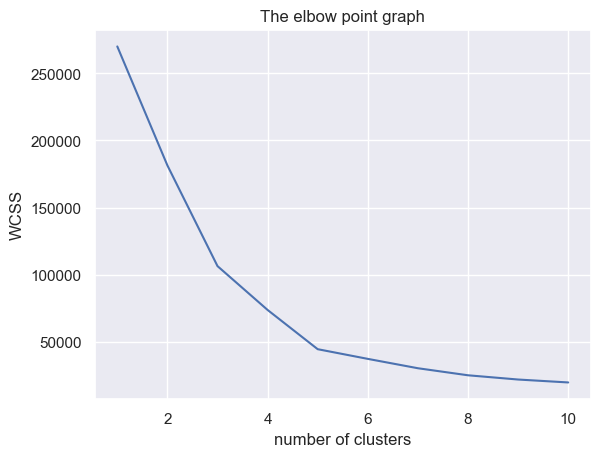

In [27]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

If you look at the above elbow point graph. 
you will find that there is no significant drop after 5. 
therefore we will choose 5 as our optimum number of clusters

Training the k-Mwans Clustering Model

In [30]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 0)

# Return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

5 clusters -0,1,2,3,4

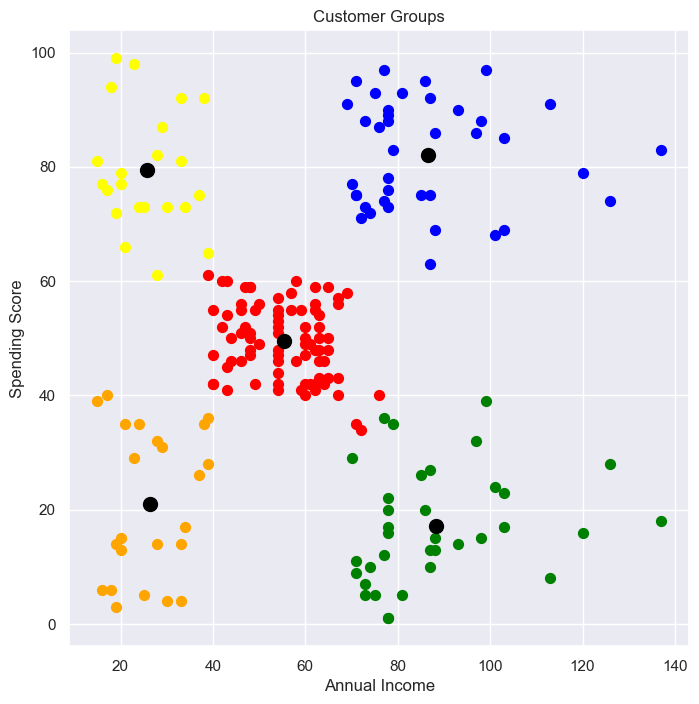

In [34]:
# plotting all the clusters and their centroids

plt.figure(figsize =(8,8))
#                      X axis                                               Y axis                           
#plt.scatter( X[ Y==cluster number,index of data point in array],X[Y== cluster number,index of data point in array],s = size of dot, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==0,0],X[Y==0,1],s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s = 50, c = 'orange', label = 'Cluster 5')

# plot the centroids

# plt.scatter(kmeans.cluster_centers_[:,x axis value of centroid],kmeans.cluster_centers_[:,Y axis value of centroid],s =100, c= 'black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s =100, c= 'black')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
## give offers to low income low spending. membership
## give offers to high income low spending. 